# Predicting proteins stability using Amino Acid Sequence Auto-correlation vectors (AASA) and Machine Learning

In [80]:
from utils import read_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from models.constant import *
from models.model import Model
import pandas as pd
import numpy as np

## Reading data
Here we are reading the data and running the discretization process

In [81]:
dataset = read_dataset("../data/aasa.xlsx", "1BPI")
X = dataset.drop(columns=TARGET_COLUMN)
Y = dataset[TARGET_COLUMN].apply(lambda x: 1 if x>=0 else 0)

## Data processing
Here the data is being split into train and test set. Also we're running the normalization

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=41,stratify=Y)

In [83]:
scaler = MinMaxScaler()
scaled_train_set = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_train_set,columns=X_train.columns)

scaled_test_set = scaler.transform(X_test)
X_test = pd.DataFrame(scaled_test_set,columns=X_test.columns)

## Models definition with its parameters to find the best model

In [84]:
svm = Model(SVM,SVC(probability=True),{'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']})
logistic_regression = Model(LOGISTIC_REGRESSION,LogisticRegression(),{'C': np.logspace(-4, 4, 20), "penalty":["l1","l2"],"solver":["liblinear"]})
knn = Model(KNN,KNeighborsClassifier(),{"n_neighbors": np.arange(1,25)})
tree = Model(DECISION_TREE,DecisionTreeClassifier(),{'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]})
mlp = Model(MLP,MLPClassifier(),{'alpha': 10.0 ** -np.arange(1,3), 'hidden_layer_sizes':(5,2), 'random_state':[1]})

## Models execution
Here we are running each of the selected models ins 'models_to_execute' variable. A classification report is being generated at the same time with the ROC curve chart

[[7 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.00      0.00      0.00         1

    accuracy                           0.88         8
   macro avg       0.44      0.50      0.47         8
weighted avg       0.77      0.88      0.82         8



/Users/gmaldonado/Library/Python/3.6/lib/python/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


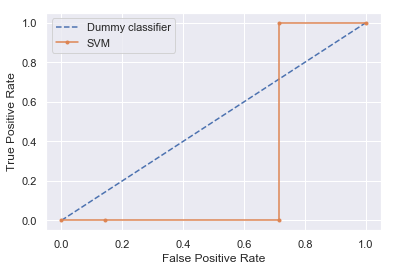

[[7 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.00      0.00      0.00         1

    accuracy                           0.88         8
   macro avg       0.44      0.50      0.47         8
weighted avg       0.77      0.88      0.82         8



/Users/gmaldonado/Library/Python/3.6/lib/python/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


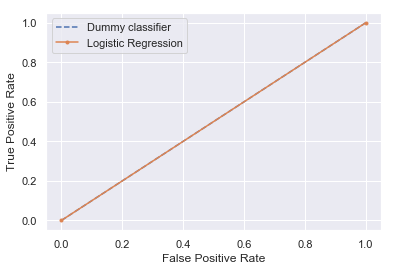

[[7 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.00      0.00      0.00         1

    accuracy                           0.88         8
   macro avg       0.44      0.50      0.47         8
weighted avg       0.77      0.88      0.82         8



/Users/gmaldonado/Library/Python/3.6/lib/python/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


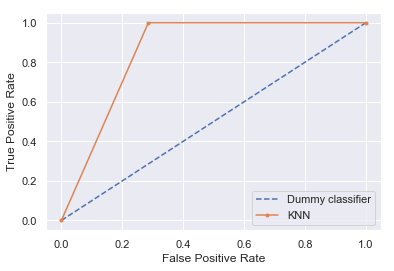

[[6 1]
 [1 0]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.00      0.00      0.00         1

    accuracy                           0.75         8
   macro avg       0.43      0.43      0.43         8
weighted avg       0.75      0.75      0.75         8



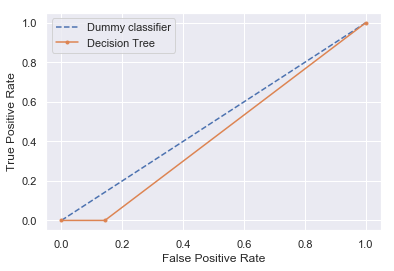

[[7 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.00      0.00      0.00         1

    accuracy                           0.88         8
   macro avg       0.44      0.50      0.47         8
weighted avg       0.77      0.88      0.82         8



/Users/gmaldonado/Library/Python/3.6/lib/python/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


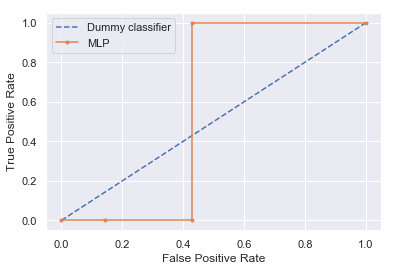

In [85]:
models_to_execute = [svm,logistic_regression,knn,tree,mlp]

for model in models_to_execute:
  model.train(X_train,y_train)
  predictions = model.predict(X_test)
  print(confusion_matrix(y_test,predictions))
  print(classification_report(y_test,predictions))
  model.draw_roc_curve(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


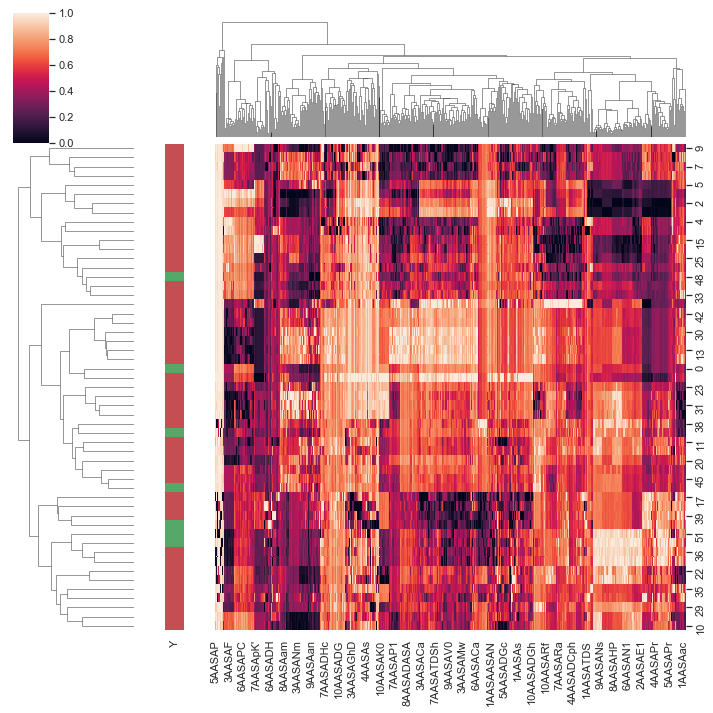

In [86]:
#TODO work in progress. More documentation https://seaborn.pydata.org/generated/seaborn.clustermap.html
import seaborn as sns; sns.set(color_codes=True)
lut = dict(zip(Y.unique(), "gr"))
row_colors = Y.map(lut)
g = sns.clustermap(X,row_colors=row_colors,standard_scale=1)